In [1]:
import cv2
from skimage import io, color, filters, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fp

# Soal 1. Image Histogram

#### a. Buatlah method predict yang menerima parameter nama_file dan mengembalikan output “hutan” untuk citra yang tergolong sebagai hutan dan lautan untuk citra yang tergolong sebagai lautan. Method predict yang dibuat wajib menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus di automasi, tidak boleh di-hardcode untuk tiap citra.

In [2]:
def predict(file_name):
    img = cv2.imread(file_name)
    
    b = img[:,:,0]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])

    frequency_count = np.bincount(img.flatten())
    cum_sum = np.cumsum(frequency_count)
    if cum_sum[127] > (cum_sum[-1] - cum_sum[127]):
        return 'hutan'
    else:
        return 'lautan'

import os
folders = ['histogram']
for folder in folders:
    for filename in os.listdir(folder):
        filename = f'{folder}/{filename}'
        print(f'image {filename} predicted as {predict(filename)}')

image histogram/forest1.jpg predicted as hutan
image histogram/forest2.jpg predicted as hutan
image histogram/forest3.jpg predicted as hutan
image histogram/forest4.jpg predicted as hutan
image histogram/sea1.jpg predicted as lautan
image histogram/sea2.jpg predicted as lautan
image histogram/sea3.jpg predicted as lautan
image histogram/sea4.jpg predicted as lautan


#### b. Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut

> Fitur yang digunakan adalah histogram pada citra bluescale. Alasannya adalah karena seperti yang kita ketahui laut itu umumnya bewarna biru dan hutan bewarna hijau. Oleh karena itu, kita dapat memilih salah satu histogram color RGB yaitu green atau blue sehingga dapat dijadikan perbandingan untuk setiap kelompok klasifikasi. Pada tugas ini, saya menggunakan blue. Jika kita plot histogram terlihat perbedaan bahwa pada bluescale histogram citra sea besar disebelah kanan yang mana berarti intensitas biru tinggi sedangkan hostogram citra forest besar disebelah kiri yang mana berarti intensitas birunya tinggi. Oleh karena itu, dari sifat tersebut kita dapat menggunakannya untuk mengkelompokkan citra laut dan hutan.

# Soal 2. Hough Transformation

#### a. Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan segitiga siku siku atau segitiga sama sisi. Manfaatkan variabel theta yang ada pada template lab untuk menentukannya. Anda dapat menggunakan cv2.HoughLines seperti yang dijabarkan pada tutorial. (Hint: Cek dalam skala apa theta dikembalikan oleh fungsi HoughLines)

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io, color


img = io.imread('segitiga/siku siku 1.jpg')
original_image = np.copy(img)

# convert image to gray
gray = (color.rgb2gray(img) * 255).astype(np.uint8)

# find all of the edges using canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# find all of the lines using hough transformation
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# plotting line
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  # This is added back by InteractiveShellApp.init_path()


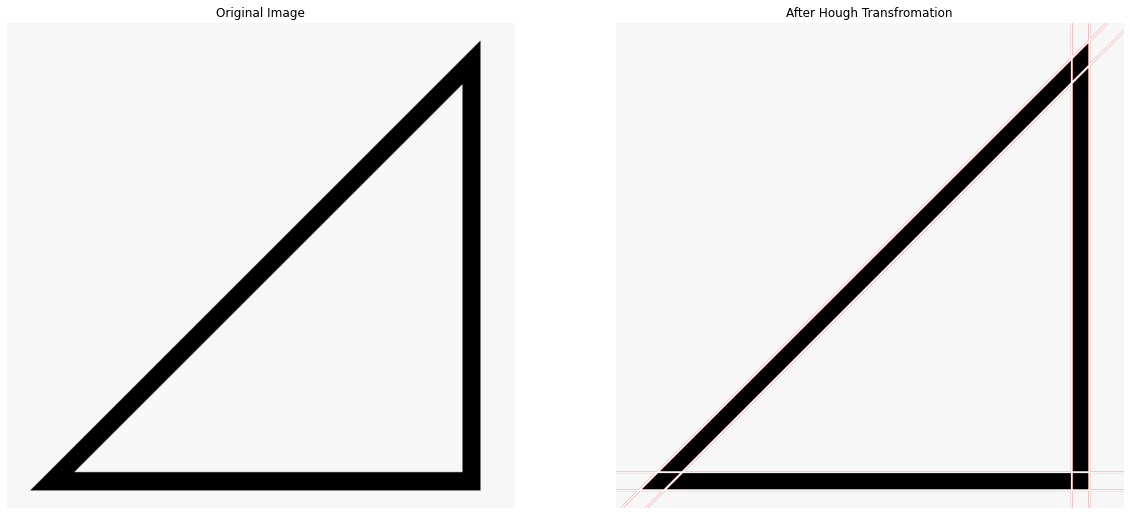

In [4]:
# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Hough Transfromation')
plt.imshow(img,)
plt.axis('off')
plt.show()


In [5]:
def predict(file_name):
    img = io.imread(file_name)
    
    # convert image to gray
    gray = (color.rgb2gray(img) * 255).astype(np.uint8)
    
    # find all of the edges using canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # find all of the lines using hough transformation
    lines = cv2.HoughLines(edges, 2, np.pi/180, 200)
    
    if len(lines) > 7:
        return 'Segitiga Sama Sisi'
    else:
        return 'Segitiga Siku-Siku'

import os
folders = ['segitiga']
for folder in folders:
    for filename in os.listdir(folder):
        filename = f'{folder}/{filename}'
        print(f'image {filename} predicted as {predict(filename)}')

image segitiga/sama sisi 1.jpg predicted as Segitiga Sama Sisi
image segitiga/sama sisi 2.jpg predicted as Segitiga Sama Sisi
image segitiga/sama sisi 3.jpg predicted as Segitiga Sama Sisi
image segitiga/sama sisi 4.jpg predicted as Segitiga Sama Sisi
image segitiga/siku siku 1.jpg predicted as Segitiga Siku-Siku


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """


image segitiga/siku siku 2.jpg predicted as Segitiga Siku-Siku
image segitiga/siku siku 3.jpg predicted as Segitiga Siku-Siku
image segitiga/siku siku 4.jpg predicted as Segitiga Siku-Siku


#### b. Jelaskan lebih detail tentang parameter yang anda gunakan sebagai argumen dan fitur yang Anda ekstraksi pada bagian a.

Pada tugas ini menggunakan Hough transformation sehingga kita dapat melihat perbedaan jumlah garis yang dimiliki oleh citra segitiga. Dari hasil Hough transformation kita mendapatkan bahwa citra yang merupakan sama sisi memiliki sekitar 9-10 garis, dan sedangkan citra yang merupakan siku-siku memiliki 6 - 7 garis. Oleh karena itu, dengan menggunakan jumlah dari garis tersebut dapat mengklasifikasikan citra mana yang kelompok sama sisi dan siku-siku. Saya menggunakan 7 sebagai batas jumlah garis untuk membedakannya. Jika citra memiliki jumlah Hough line lebih dari 7 maka citra diklasifikasikan sebagai sama sisi. Sebaliknya, jika jumlah Hough line kurang dari 7, maka citra diklasfikasikan sebagai siku-siku.

# Soal 3. Template Matching

#### a. Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar! Anda bisa menggunakan library OpenCV/Skimage/lainnya.

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Import citra yang dibutuhkan
pertandingan_1 = cv.cvtColor(cv.imread('template matching/pertandingan 1.jpeg'), cv.COLOR_BGR2RGB)
pertandingan_2 = cv.cvtColor(cv.imread('template matching/pertandingan 2.jpeg'), cv.COLOR_BGR2RGB)
template_bola = cv.cvtColor(cv.imread('template matching/bola.jpg'),cv.COLOR_BGR2RGB)

In [7]:
# Ubah gray
pertandingan_1_gray = cv.cvtColor(pertandingan_1,cv.COLOR_RGB2GRAY)
pertandingan_2_gray = cv.cvtColor(pertandingan_2,cv.COLOR_RGB2GRAY)
template_bola_gray = cv.cvtColor(template_bola,cv.COLOR_RGB2GRAY)

# Menyimpan width dan height template
w, h = template_bola_gray.shape[::-1]

# Apply template matching
# parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut danpilihan method lainnya
res1 = cv.matchTemplate(pertandingan_1_gray,template_bola_gray, cv.TM_CCOEFF_NORMED)
res2 = cv.matchTemplate(pertandingan_2_gray,template_bola_gray, cv.TM_CCOEFF_NORMED)

In [8]:
# Copy citra monas untuk ditandai bounding box
template_matched_1 = pertandingan_1.copy()
template_matched_2 = pertandingan_2.copy()

# Tentukan threshold
threshold = 0.9
threshold2 = 0.32
loc1 = np.where( res1 >= threshold)
loc2 = np.where( res2 >= threshold2)

# Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color,thickness)
for point in zip(*loc1[::-1]):
    cv.rectangle(template_matched_1, point, (point[0] + w,point[1] + h), (255,0,0), 2)
    
for point in zip(*loc2[::-1]):   
    cv.rectangle(template_matched_2, point, (point[0] + w,point[1] + h), (255,0,0), 2)

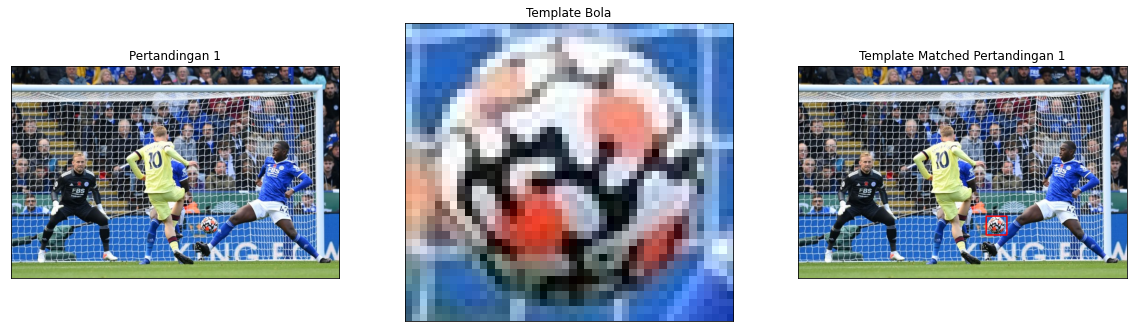

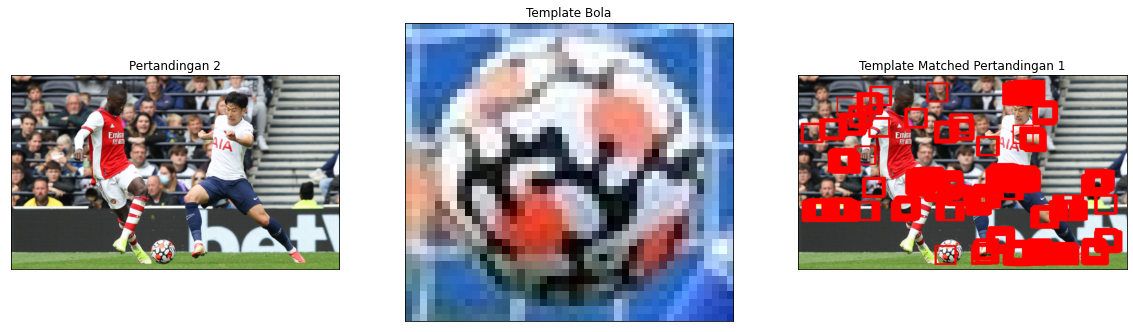

In [9]:
# Menampilkan citra
plt.figure(figsize=(20,10))

plt.subplot(131),plt.imshow(pertandingan_1)
plt.title('Pertandingan 1'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(template_bola)
plt.title('Template Bola'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(template_matched_1)
plt.title('Template Matched Pertandingan 1'), plt.xticks([]),plt.yticks([])
plt.show()


plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(pertandingan_2)
plt.title('Pertandingan 2'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(template_bola)
plt.title('Template Bola'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(template_matched_2)
plt.title('Template Matched Pertandingan 1'), plt.xticks([]),plt.yticks([])
plt.show()

####  b. Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Mengapa perbedaan ini terjadi?

> Dari hasil eksplorasi diatas terlihat bahwa ketika kedua gambar pertandingan menggunakan threshold yang sama yaitu 0,9 maka pada pertandingan 1 terlihat bahwa template matching berhasil mendeteksi objek dengan baik karena semakin tinggi nilai threshold maka fungsi template match akan mencari bagian citra yang sangat mirip dengan template sedangkan pada pertandingan 2 tidak terdeteksi apapun. Karena hal tersebut, kita bisa mencoba menurunkan thresholdnya agar mampu mendeteksi tempalate bola. Terlihat bahwa pada threshold 0,32 template bola sudah bisa terdeteksi, namun banyaknya objek lain yang seharusnya tidak ikut terdeteksi. Itu berarti metode Template matching masih belum  menemukan bagian kecil dari sebuah citra sesuai dengan template yang diinginkan dengan benar. Hal tersebut bisa disebabkan karena Template tersebut yang berperan sebagai jendela yang digeser sepanjang citra (konvolusi) kurang  cocok  dengan bagian citra yang tercover oleh template.

#### c. Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini? Apakah untuk kasus template matching untuk bola pada gambar pertandingan sepak bola cocok?

> Kelebihan metode template matching adalah jika kita menggunakan nilai threshold yang tepat maka  dapat mengenali bagian citra yang sama atau mirip dengan template berdasarkan ukuran maupun warnanya.
Namun, Kekurangan dari template matching adalah kurang dapat mengenali citra jika bentuk atau ukurannya terlalu berbeda sehingga template matching bisa tidak  mengenalinya. Oleh karena itu menurut saya, kasus template matching untuk bola pada gambar pertandingan sepak bola dapat digunakan jika kita mempunyai  citra lain yang lebih banyak sebagai template untuk mengenali lebih banyak variasi lainnya.